Processing the frequency spectrum of a pulse into time lag series

In [2]:
import numpy as np
from scipy.stats.stats import pearsonr
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.time import Time

from os.path import exists 
#from GPbaseband1 import *

#Using latex rendering:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

if exists('./figures/correlation_coeff/giant_pulses{}chan.npz'.format(nchan)):
    with np.load('./figures/correlation_coeff/giant_pulses{}chan.npz'.format(nchan)) as npzfile:
        freq_values = npzfile['freq_values']
        time_values = npzfile['time_values']
        noise_sigma_values = npzfile['noise_sigma_values']
    #load the giant pulse average smoothed and normalized:
    gpab=np.load('./figures/correlation_coeff/gpa_smoothed.npy')

/opt/python/2.7.10/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


SyntaxError: invalid syntax (GPbaseband1.py, line 210)

In [28]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


In [39]:
nchan = 512
'''

'''
def process_freq_spec(gp1,index,draw=1):
    '''function takes a continuous frequency spectrum and cuts it into 8 bands, divide by the giant pulse mean, and normalize it by itself gp1=freq_spec[i]. function also plots the frequency spectrum'''
    gp1_8=np.zeros(shape=(0,425))
    for j in range(8):gp1_8=np.append(gp1_8,np.array([gp1[j*513+40:j*513+465]]),0)
    gp1_8/=gpab #Dividing by giant pulse average
    for i in range(8):gp1_8[i]=gp1_8[i]/gp1_8[i].mean()-1.
    if draw==1:
        f,axarr=plt.subplots(8,1,figsize=(10,15))

        for i in range(8):axarr[i].plot(gp1_8[i])
        axarr[0].set_title('Frequency spectrum of giant pulse at {}'.format(time_values[index]))
    return gp1_8

def transform_to_timelag(fgp,index):
    tgp=np.zeros(shape=(0,213))
    for i in range(8):tgp=np.append(tgp,np.array([np.fft.rfft(fgp[i])]),0)

    f,axarr=plt.subplots(8,1,figsize=(10,15))
    for i in range(8):axarr[i].plot(np.linspace(0,16,213),abs(tgp[i]))
    axarr[0].set_title('Time lag spectrum of giant pulse at {}'.format(time_values[index]))
    axarr[7].set_xlabel('Time lag(\mu s)')
    return tgp

def plot_2_timelag(tgp1,tgp2,index):
    '''index is an list of 2 indices'''
    f,axarr=plt.subplots(8,1,figsize=(6,10))
    for i in range(8):
        axarr[i].plot(np.linspace(0,16,213),abs(tgp1[i]))
        axarr[i].plot(np.linspace(0,16,213),abs(tgp2[i]))
    axarr[0].set_title('Time lag spectrum of giant pulse at {},{}'.format(time_values[index[0]],time_values[index[1]]))
    axarr[7].set_xlabel(r'Time lag(\mu s)')
    return tgp


Populating the interactive namespace from numpy and matplotlib


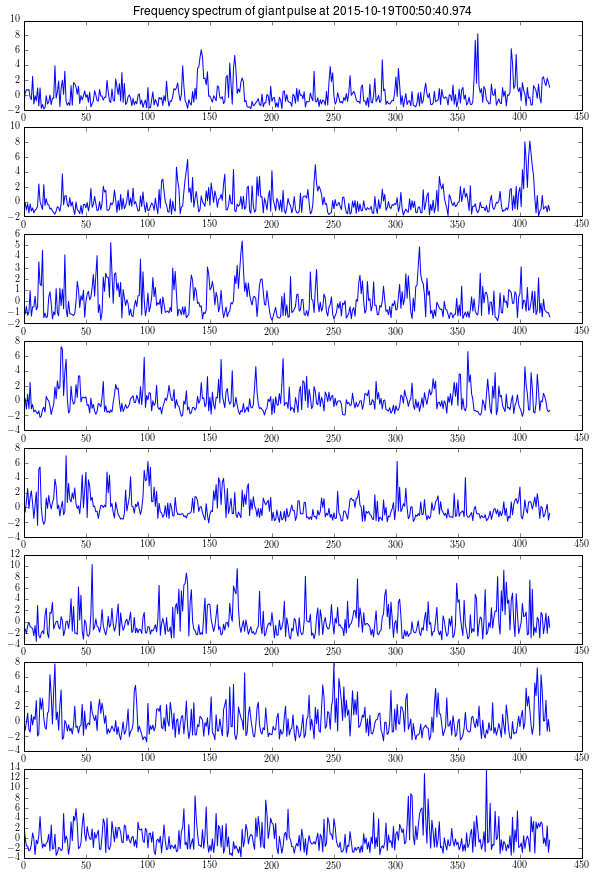

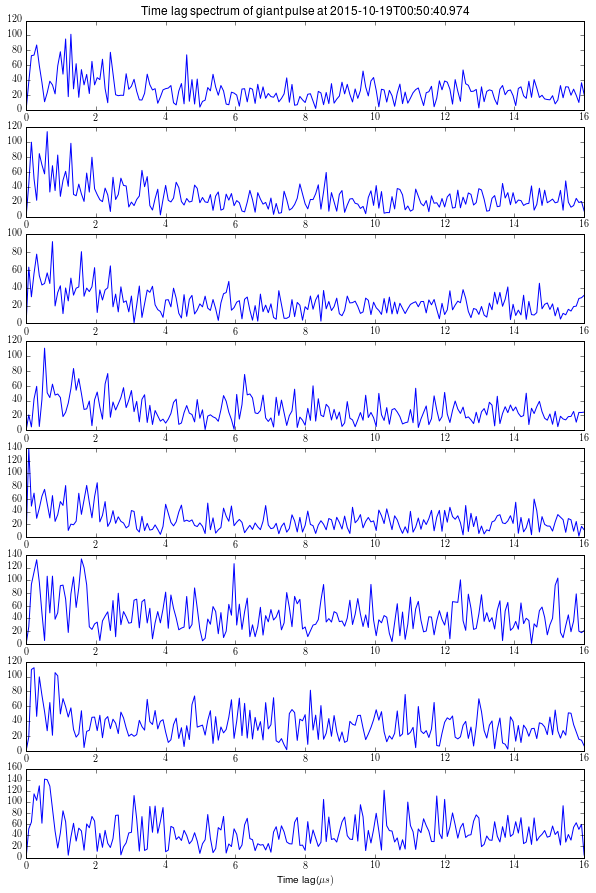

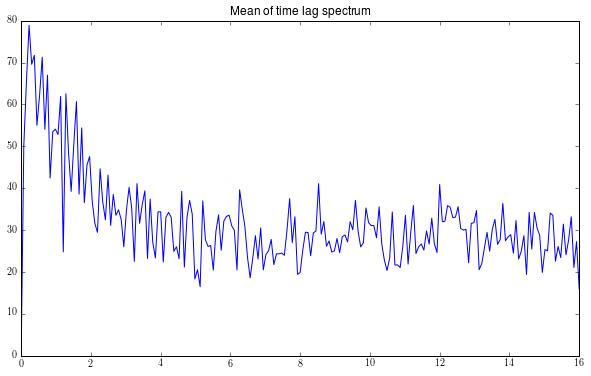

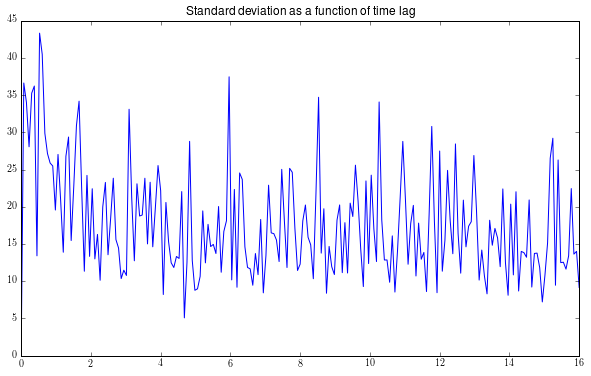

In [63]:
%pylab inline

i=100
fgp10=process_freq_spec(freq_values[i],i,draw=1)
tgp10=transform_to_timelag(fgp10,i)

def plotmean(tgp10):
    figure(figsize=(10,6))
    plot(np.linspace(0,16,213),abs(tgp10).mean(0))
    title('Mean of time lag spectrum')
    
def find_std(tgp):
    stda=np.std(abs(tgp),axis=0)
    figure(figsize=(10,6))
    plot(np.linspace(0,16,213),stda)
    title('Standard deviation as a function of time lag')
    
plotmean(tgp10)
find_std(tgp10)

In [59]:
abs(tgp10).shape



(8, 213)